In [16]:
import pandas as pd
import matplotlib as mpl
import glob

import matplotlib.pyplot as plt
s = 15
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

In [6]:
all_files = glob.glob("dirty data/*.csv")
cities = ['JFK', 'DFW', 'MCO', 'LAX', 'SEA']

df = pd.DataFrame()

for f in all_files:
    temp = pd.read_csv(f)
    df = df.append(temp.loc[temp['Origin'].isin(cities)])

removables = [
    'Year','Tail_Number', 'OriginAirportID',
    'OriginAirportSeqID','OriginCityMarketID','OriginCityName',
    'OriginState','OriginStateFips','OriginStateName','OriginWac', 
    'DestAirportID','DestAirportSeqID','DestCityMarketID',
    'DestCityName','DestState','DestStateFips','DestStateName',
    'DestWac','DepTime', 'DepDel15',
    'DepartureDelayGroups','DepTimeBlk','WheelsOff','WheelsOn',
    'CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes','ArrDel15',
    'ArrivalDelayGroups','ArrTimeBlk','CancellationCode',
    'Flights','FirstDepTime',
    'TotalAddGTime','LongestAddGTime'
]

for remove in removables:
    try:
        df = df.drop(remove, axis=1)
    except Exception as e:
        print(f'Already Removed {remove} or {e}')


df.size

/tmp/ipykernel_1385943/1833538880.py:7: DtypeWarning: Columns (48,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(f)
/tmp/ipykernel_1385943/1833538880.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp.loc[temp['Origin'].isin(cities)])
/tmp/ipykernel_1385943/1833538880.py:7: DtypeWarning: Columns (48,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(f)
/tmp/ipykernel_1385943/1833538880.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp.loc[temp['Origin'].isin(cities)])
/tmp/ipykernel_1385943/1833538880.py:7: DtypeWarning: Columns (48,69,76,77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(f)
/tmp/ipykernel

69367008

delayed time as boxplot
column plot of count of delay types




In [7]:
pd.set_option('display.max_columns', None)
df.head()

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Flight_Number_Reporting_Airline,Origin,Dest,CRSDepTime,DepDelay,DepDelayMinutes,TaxiOut,TaxiIn,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
47,3,7,20,6,2019-07-20,G4,20368,G4,329,LAX,FAR,630,-7.0,0.0,22.0,6.0,0.0,0.0,198.0,207.0,179.0,1440.0,6,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,3,7,4,4,2019-07-04,G4,20368,G4,307,LAX,SGF,715,-12.0,0.0,16.0,10.0,0.0,0.0,201.0,198.0,172.0,1423.0,6,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,3,7,4,4,2019-07-04,G4,20368,G4,1398,LAX,CVG,2250,-3.0,0.0,14.0,24.0,0.0,0.0,261.0,270.0,232.0,1900.0,8,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,3,7,14,7,2019-07-14,G4,20368,G4,349,LAX,MFE,1354,-10.0,0.0,21.0,5.0,0.0,0.0,194.0,187.0,161.0,1318.0,6,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,3,7,26,5,2019-07-26,G4,20368,G4,1398,LAX,CVG,2321,61.0,61.0,17.0,8.0,0.0,0.0,261.0,252.0,227.0,1900.0,8,0.0,0.0,0.0,0.0,52.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='Delay Time (15 min bins)', ylabel='count'>

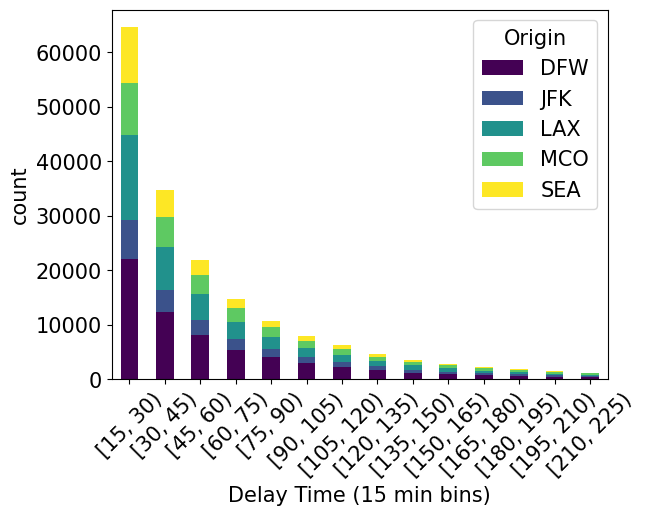

In [17]:
groups = df.loc[df["DepDelayMinutes"] > 0].groupby(by=["Origin"])

binvals = range(15, 240, 15)
df["bin"] = pd.cut(df.DepDelayMinutes, bins=binvals, right=False)


df.groupby("bin").Origin.value_counts().unstack(
    ).plot.bar(stacked=True, colormap="viridis", xlabel="Delay Time (15 min bins)", ylabel="count", rot=45)


<AxesSubplot: title={'center': 'Total Number of Delays'}, xlabel='Origin', ylabel='Count'>

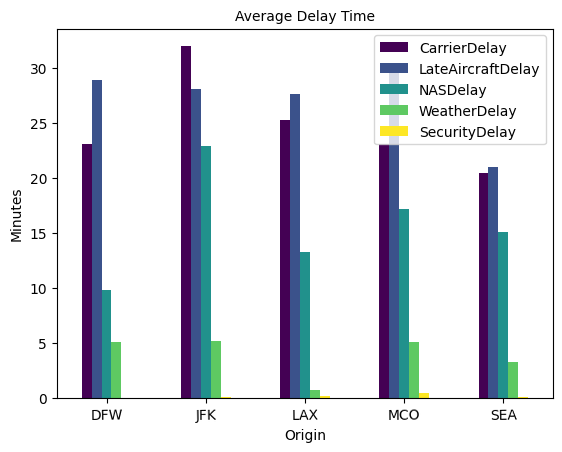

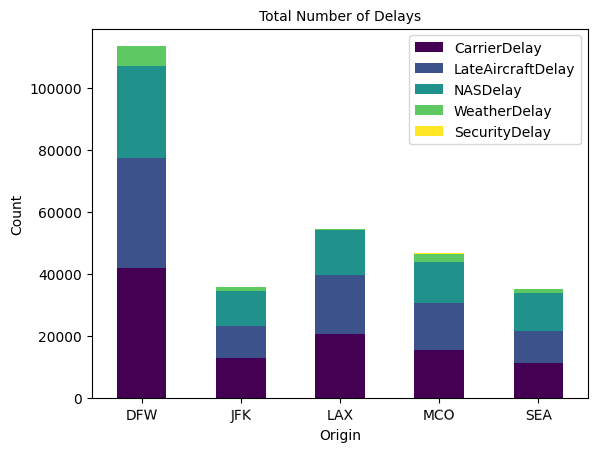

In [9]:
def get_counts(row):
    row = row.dropna().map(lambda x: 1 if x > 0 else 0)
    return row.sum()

groups.agg(
    {'CarrierDelay':'mean', 'LateAircraftDelay':'mean', 'NASDelay':'mean', 'WeatherDelay':'mean', 'SecurityDelay':'mean'}
    ).plot(kind="bar", title="Average Delay Time", ylabel="Minutes", rot=1, colormap="viridis")

groups.agg(
    {'CarrierDelay':get_counts, 'LateAircraftDelay':get_counts, 'NASDelay':get_counts, 'WeatherDelay':get_counts, 'SecurityDelay':get_counts}
    ).plot(kind="bar", title="Total Number of Delays", ylabel="Count", rot=1, colormap="viridis", sharey=False, stacked=True)



<AxesSubplot: ylabel='count'>

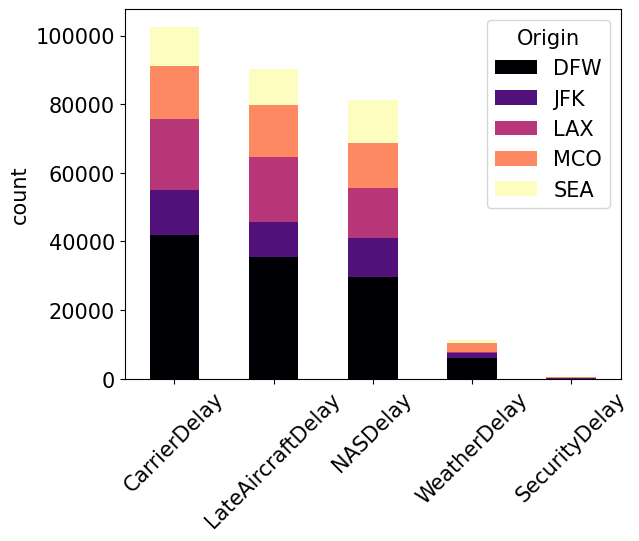

In [19]:
gagg = groups.agg(
    {'CarrierDelay':get_counts, 'LateAircraftDelay':get_counts, 'NASDelay':get_counts, 'WeatherDelay':get_counts, 'SecurityDelay':get_counts}
    )
gagg.T.plot.bar(stacked=True, colormap="magma", ylabel="count", rot=45)


# Weather Data

In [11]:
weatherdf = pd.read_csv('clean/clean_weather.csv')
weatherdf['midtemp'] = (weatherdf['TMAX'] + weatherdf['TMIN']) / 2
weatherdf['yerr'] = (weatherdf['TMAX'] - weatherdf['TMIN']) / 2
weatherdf['month'] = weatherdf.DATE.map(lambda x: x[5:7])
weatherdf['day'] = weatherdf.DATE.map(lambda x: x[8::])
weatherdf


,Unnamed: 0,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,"PRCP_ATTRIBUTES - ,,N","PRCP_ATTRIBUTES - ,,W,2400","PRCP_ATTRIBUTES - T,,N","PRCP_ATTRIBUTES - T,,W,2400","SNOW_ATTRIBUTES - ,,N","SNOW_ATTRIBUTES - ,,W","SNOW_ATTRIBUTES - ,,W,2400","SNOW_ATTRIBUTES - T,,W","SNOW_ATTRIBUTES - T,,W,2400","SNWD_ATTRIBUTES - ,,W","SNWD_ATTRIBUTES - ,,W,2400","SNWD_ATTRIBUTES - T,,W,2400","WT01_ATTRIBUTES - ,,W","WT02_ATTRIBUTES - ,,W","WT03_ATTRIBUTES - ,,W","WT04_ATTRIBUTES - ,,W","WT08_ATTRIBUTES - ,,W",midtemp,yerr,month,day
0,0,LAX,33.93816,-118.3866,29.7,2019-01-01,2.8,0.0,NaN,NaN,12.1,16.7,5.0,330.0,310.0,8.1,11.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.85,5.85,01,01
1,1,LAX,33.93816,-118.3866,29.7,2019-01-02,2.1,0.0,NaN,NaN,11.2,16.1,3.9,250.0,250.0,6.3,7.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.00,6.10,01,02
2,2,LAX,33.93816,-118.3866,29.7,2019-01-03,2.8,0.0,NaN,NaN,12.4,18.9,7.2,270.0,280.0,6.7,8.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.05,5.85,01,03
3,3,LAX,33.93816,-118.3866,29.7,2019-01-04,2.1,0.0,NaN,NaN,12.4,17.2,6.7,270.0,290.0,5.4,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.95,5.25,01,04
4,4,LAX,33.93816,-118.3866,29.7,2019-01-05,3.4,14.2,NaN,NaN,12.5,14.4,8.9,60.0,110.0,8.1,9.8,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,11.65,2.75,01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1976,JFK,40.63915,-73.7639,2.7,2019-12-27,3.6,0.0,0.0,0.0,8.7,11.1,6.7,240.0,230.0,5.8,7.2,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,8.90,2.20,12,27
1977,1977,JFK,40.63915,-73.7639,2.7,2019-12-28,3.8,0.0,0.0,0.0,8.1,11.1,2.8,310.0,320.0,6.7,8.1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,6.95,4.15,12,28
1978,1978,JFK,40.63915,-73.7639,2.7,2019-12-29,2.9,9.1,0.0,0.0,5.0,6.7,0.6,80.0,90.0,6.7,8.1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,3.65,3.05,12,29
1979,1979,JFK,40.63915,-73.7639,2.7,2019-12-30,8.4,12.7,0.0,0.0,5.6,6.7,3.3,70.0,80.0,14.8,19.2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,5.00,1.70,12,30


NAME
DFW    AxesSubplot(0.125,0.11;0.775x0.77)
JFK    AxesSubplot(0.125,0.11;0.775x0.77)
LAX    AxesSubplot(0.125,0.11;0.775x0.77)
MCO    AxesSubplot(0.125,0.11;0.775x0.77)
SEA    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

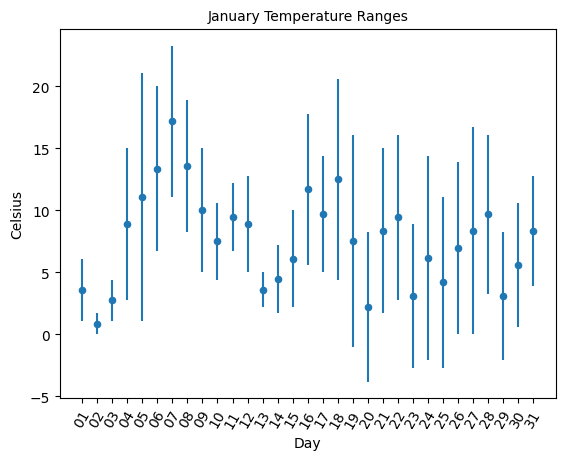

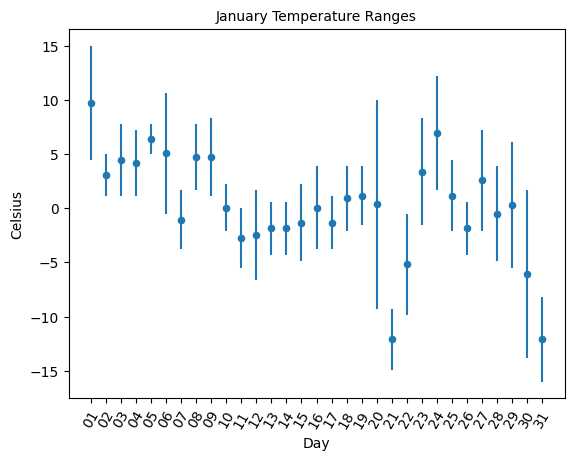

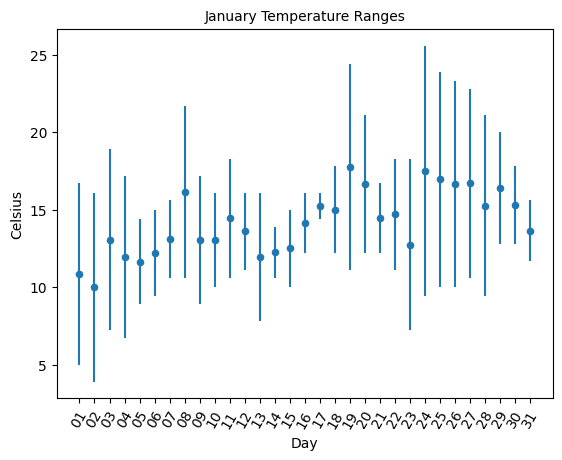

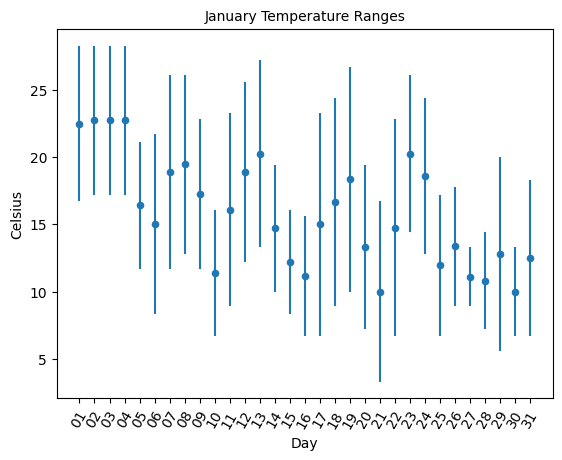

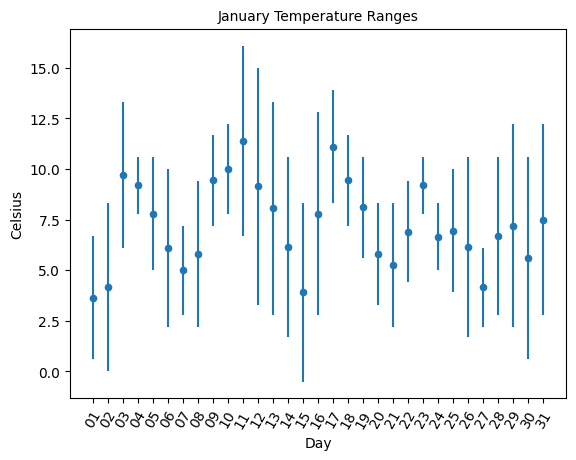

In [12]:
weatherdf.groupby('month').get_group('01').groupby('NAME').plot.scatter(x='day', y='midtemp', yerr='yerr', rot=60, title='January Temperature Ranges', ylabel='Celsius', xlabel='Day')


In [13]:
df.shape

(937392, 75)